<a href="https://colab.research.google.com/github/TeraneAgaeva/Data-Analysis-course-/blob/main/%22%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%94_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%D0%9C%D0%BE%D0%B4%D1%83%D0%BB%D1%8C%E2%84%965%20%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F%204_Pandas_%2B_SQL_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Завдання на використання Pandas + SQL

В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робили в попередній домашці:

In [57]:
!pip install mysql-connector-python

In [58]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

In [59]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

In [60]:
import pandas as pd

1. Виведіть кількість співробітників за роком, в який вони були найняті (hire_date) використовуючи pandas.read_sql. Запишіть результат в змінну df та виведіть значення змінної на екран.

In [46]:
sql = """
SELECT YEAR(hire_date) AS hire_year, COUNT(*) AS emp_num
FROM employees
GROUP BY hire_year
ORDER BY hire_year"""

In [47]:
df = pd.read_sql(sql, con)
df

<ipython-input-47-4c324f59c549>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con)


,hire_year,emp_num
0,1985,35316
1,1986,36150
2,1987,33501
3,1988,31436
4,1989,28394
5,1990,25610
6,1991,22568
7,1992,20402
8,1993,17772
9,1994,14835


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1JmyPlxFwRRxuCJ33VN-AqMDPSdV_DPXI)

2. Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

In [61]:
import matplotlib.pyplot as plt
import numpy as np

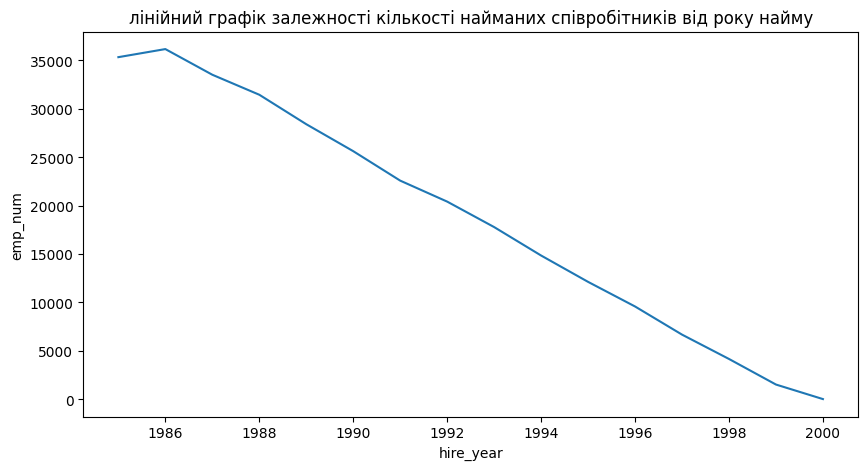

In [49]:
plt.figure(figsize=(10, 5))  # створюємо фігуру
x = df['hire_year']
y = df['emp_num']

plt.plot(x,y)
plt.title("лінійний графік залежності кількості найманих співробітників від року найму")
plt.xlabel("hire_year")
plt.ylabel("emp_num");

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1vXUpPNNvIL5dxsypr9sklvtq-H-NDwzU)

3. З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [50]:
pd.read_sql(f'show columns from salaries', con)

<ipython-input-50-3a120bdbd2fd>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(f'show columns from salaries', con)


,Field,Type,Null,Key,Default,Extra
0,emp_no,int,NO,PRI,None,
1,salary,int,NO,,None,
2,from_date,date,NO,PRI,None,
3,to_date,date,NO,,None,


In [51]:
df = pd.read_sql(f'SELECT * FROM salaries Limit 10', con)
df

<ipython-input-51-dfb62e909103>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f'SELECT * FROM salaries Limit 10', con)


,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25
5,10001,71046,1991-06-25,1992-06-24
6,10001,74333,1992-06-24,1993-06-24
7,10001,75286,1993-06-24,1994-06-24
8,10001,75994,1994-06-24,1995-06-24
9,10001,76884,1995-06-24,1996-06-23


In [52]:
df = pd.read_sql(f'SELECT * FROM titles Limit 10', con)
df

<ipython-input-52-4a61a075ca2a>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f'SELECT * FROM titles Limit 10', con)


,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
5,10005,Senior Staff,1996-09-12,9999-01-01
6,10005,Staff,1989-09-12,1996-09-12
7,10006,Senior Engineer,1990-08-05,9999-01-01
8,10007,Senior Staff,1996-02-11,9999-01-01
9,10007,Staff,1989-02-10,1996-02-11


1 спосіб

In [71]:
sql1 = """
SELECT to_date,from_date, TIMESTAMPDIFF(YEAR, from_date, to_date) AS duration
FROM titles
WHERE title = 'Engineer' and to_date!='9999-01-01'"""

In [72]:
df_years = pd.read_sql(sql1, con)
df_years

<ipython-input-72-3ec521b8a1db>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_years = pd.read_sql(sql1, con)


,to_date,from_date,duration
0,1995-12-01,1986-12-01,9
1,1995-02-18,1990-02-18,5
2,2000-12-18,1992-12-18,8
3,1995-04-03,1987-04-03,8
4,2001-03-19,1995-03-20,5
...,...,...,...
84015,1998-11-23,1989-11-23,9
84016,1994-07-30,1989-07-30,5
84017,1993-10-27,1993-02-22,0
84018,2002-05-13,1996-05-13,6


2 спосіб

In [73]:
df_years1 = pd.read_sql(f'SELECT to_date, from_date, TIMESTAMPDIFF(YEAR, from_date, to_date) AS duration FROM titles WHERE title = "Engineer" and to_date!="9999-01-01"', con)
df_years1

<ipython-input-73-377c66edc468>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_years1 = pd.read_sql(f'SELECT to_date, from_date, TIMESTAMPDIFF(YEAR, from_date, to_date) AS duration FROM titles WHERE title = "Engineer" and to_date!="9999-01-01"', con)


,to_date,from_date,duration
0,1995-12-01,1986-12-01,9
1,1995-02-18,1990-02-18,5
2,2000-12-18,1992-12-18,8
3,1995-04-03,1987-04-03,8
4,2001-03-19,1995-03-20,5
...,...,...,...
84015,1998-11-23,1989-11-23,9
84016,1994-07-30,1989-07-30,5
84017,1993-10-27,1993-02-22,0
84018,2002-05-13,1996-05-13,6


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1nBqeBVYFuSQlMx9lNaDJJ_8hMx7yV9bX)

4. Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

In [75]:
# Групуємо дані за стовпцем 'duration' і рахуємо кількість записів у кожній групі
df_s1 = df_years.groupby('duration').size().reset_index(name='count')

# Виводимо результат
print(df_s1)

   duration  count
0         0   3190
1         1   3167
2         2   2782
3         3   2291
4         4   6249
5         5  22346
6         6   8210
7         7  13918
8         8  14239
9         9   7628


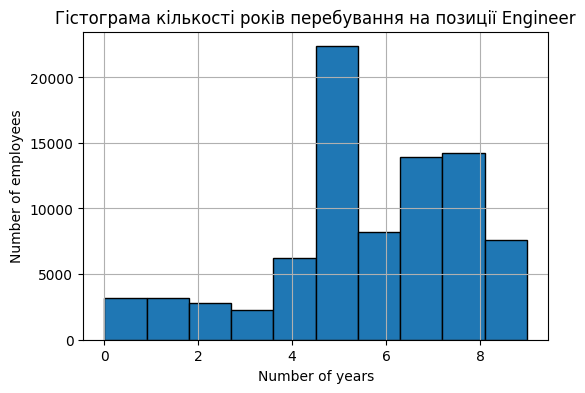

In [87]:
import matplotlib.pyplot as plt

# Створення гістограми
plt.figure(figsize=(6, 4))
plt.hist(df_years['duration'], bins=10, edgecolor='black')

# Додавання підписів та заголовка
plt.title("Гістограма кількості років перебування на позиції Engineer")
plt.xlabel("Number of years")
plt.ylabel("Number of employees")

plt.grid(True)
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1RKbfs5R9oniNs9XJcUpdlXFT-0BKXvPB)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [ ]:
con.close()